# Load Excel Data and Plot & Analyze it
Using 
* Numpy
* Matplotlib
* Pandas (for import --> there are lots of options for this, e.g. openpyxl)

In [1]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
# from openpyxl import load_workbook
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['xtick.labelsize'] = 20.
plt.rcParams['ytick.labelsize'] = 20.
plt.rcParams['axes.labelsize'] = 25.

# 1. Read Data from Excel and Put it in Array
* Read Excel with `pandas`

## Important Info On Data : 
* There are 200,000 points recorded in 10 secs duration. Thus, <br>
     1 sec = 20000 points<br>
     1 point = 0.05 $\mu$secs

In [2]:
df = pd.read_excel(r'Sweep0_12.xlsx',header=None)

In [3]:
df

,0
0,-76.25
1,-778125.00
2,-79375.00
3,-765625.00
4,-753125.00
5,-75625.00
6,-740625.00
7,-734375.00
8,-759375.00
9,-759375.00


In [4]:
df.columns = ['Data']

In [5]:
df

,Data
0,-76.25
1,-778125.00
2,-79375.00
3,-765625.00
4,-753125.00
5,-75625.00
6,-740625.00
7,-734375.00
8,-759375.00
9,-759375.00


###  You can of course plot and stuff in `pandas`
* but we will use Numpy for analysis 

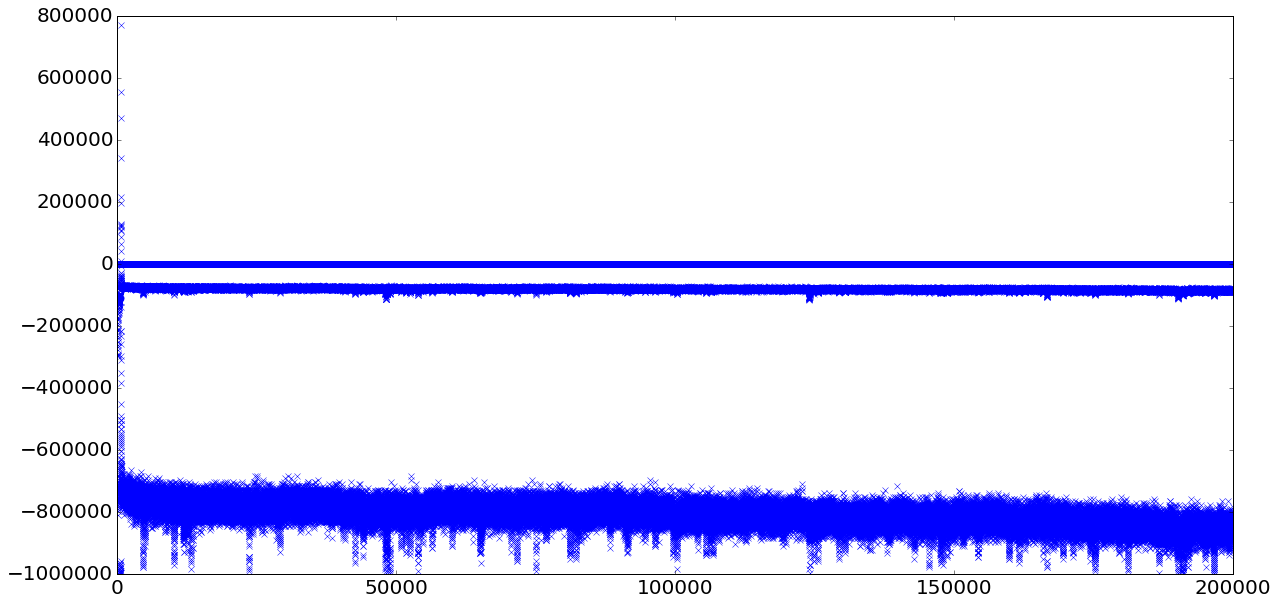

In [6]:
df.plot(marker ='x',linewidth=0,legend=False)
#data[:100].plot(linewidth=1,style='rx',linewidth=1,color='b')
plt.show()

# We will work with `numpy` here
### Lets get the array in `numpy`  and also calculate time array 

In [7]:
data = df.values.flatten()

In [8]:
data

array([ -7.62500000e+01,  -7.78125000e+05,  -7.93750000e+04, ...,
        -8.28125000e+05,  -8.37500000e+01,  -8.43750000e+04])

In [9]:
data.size

200000

## Task 1 : Make timeArray 
* timeArray will contain time points in $\mu$secs for each data points

In [10]:
#calculating the time 
timeArray = 0.05*np.arange(data.size)
print timeArray[:10],'\n', timeArray[-10:]

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45] 
[ 9999.5   9999.55  9999.6   9999.65  9999.7   9999.75  9999.8   9999.85
  9999.9   9999.95]


### Lets stack the time and obervation data in same array

In [11]:
combinedData = np.vstack((timeArray,data))

In [12]:
print(" Shape : " ,combinedData.shape)
print(combinedData)

(' Shape : ', (2, 200000))
[[  0.00000000e+00   5.00000000e-02   1.00000000e-01 ...,   9.99985000e+03
    9.99990000e+03   9.99995000e+03]
 [ -7.62500000e+01  -7.78125000e+05  -7.93750000e+04 ...,  -8.28125000e+05
   -8.37500000e+01  -8.43750000e+04]]


In [13]:
print(combinedData[0])# This is time array that we created above

[  0.00000000e+00   5.00000000e-02   1.00000000e-01 ...,   9.99985000e+03
   9.99990000e+03   9.99995000e+03]


In [14]:
print(combinedData[1])# This is our imported observation data

[ -7.62500000e+01  -7.78125000e+05  -7.93750000e+04 ...,  -8.28125000e+05
  -8.37500000e+01  -8.43750000e+04]


<hr style="height:3px;border:none;color:#333;background-color:#333;" />

# 2. Plotting `numpy` array with `matplotlib`

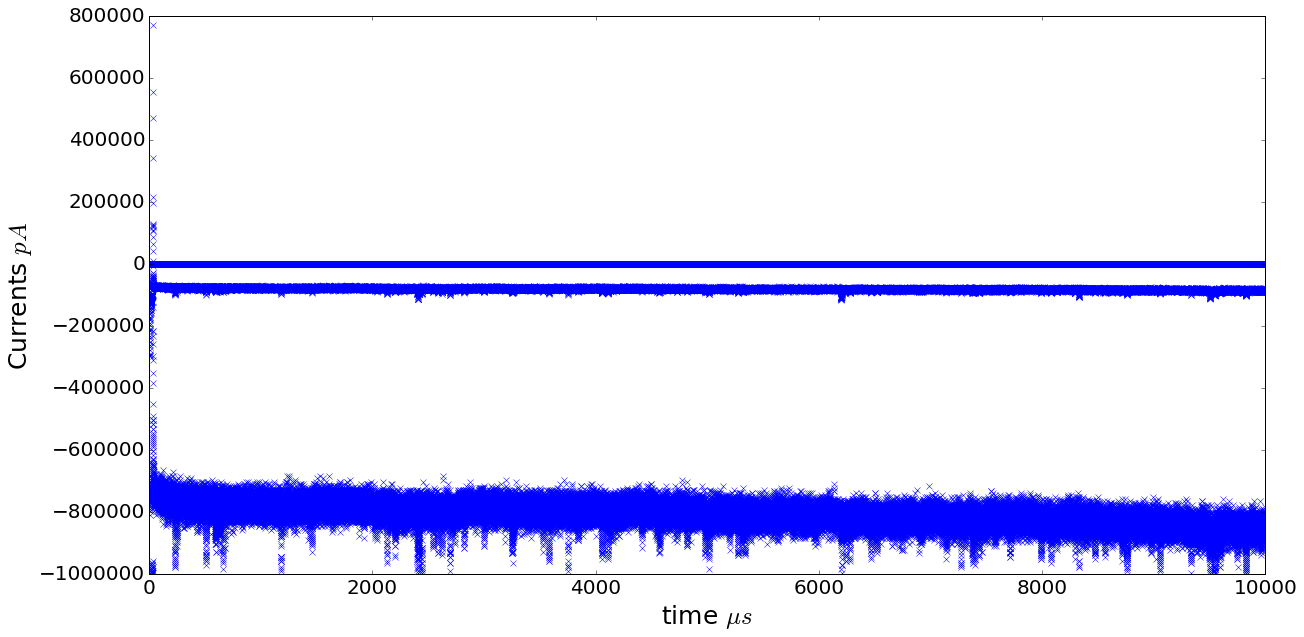

In [15]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
ax.plot(combinedData[0],combinedData[1],'x')
ax.set_xlabel(r'time $\mu s$')
ax.set_ylabel('Currents $pA$')
plt.show()

## Task2 : Make a function to plot  : plotData(timeArray,data)
* use Matplotlib. 
As we will be doing a lot of plotting, it is wise to make a function

In [16]:
def plotData(dA):
    fig = plt.figure(1)
    ax = fig.add_subplot(1,1,1)
    #plt.rc('text', usetex=True)
    #plt.rc('font', family='serif')
    ax.plot(dA[0],dA[1],'x')
    ax.set_xlabel(r'time $\mu s$')
    ax.set_ylabel('Currents $pA$')
    ax.set_ylim(-1000000,0)
    plt.show()

In [17]:
combinedData[:,:1500]

array([[  0.00000000e+00,   5.00000000e-02,   1.00000000e-01, ...,
          7.48500000e+01,   7.49000000e+01,   7.49500000e+01],
       [ -7.62500000e+01,  -7.78125000e+05,  -7.93750000e+04, ...,
         -7.37500000e+01,  -7.46875000e+05,  -7.62500000e+01]])

## Early data have faults, lets get ride of it

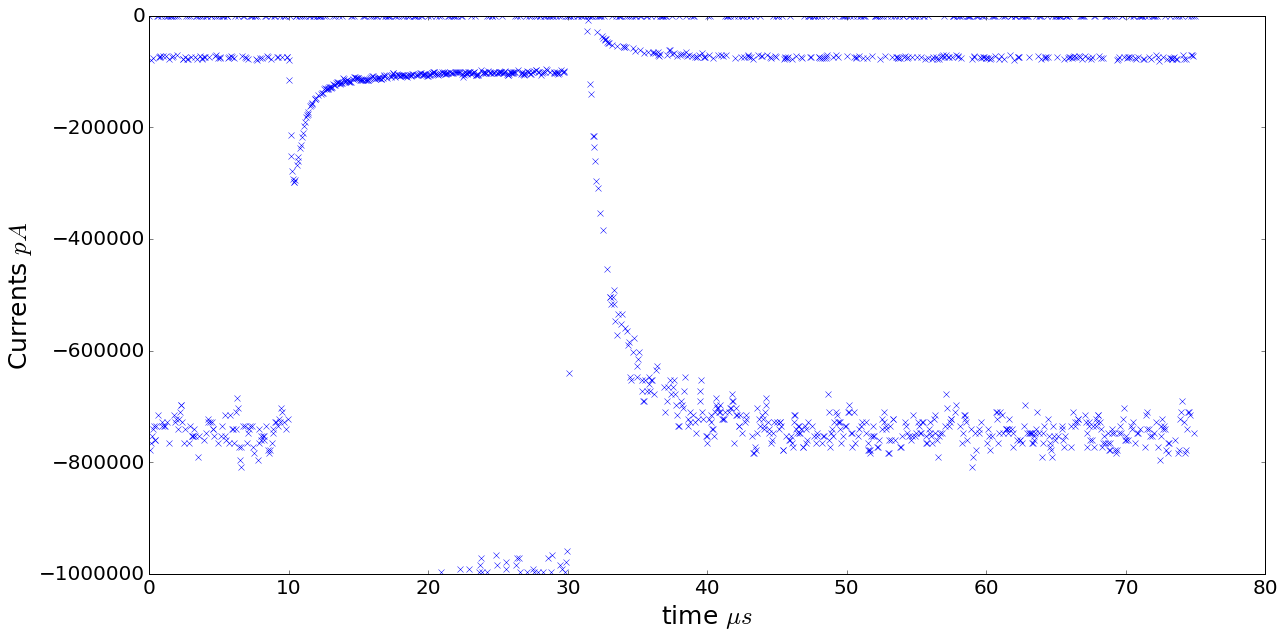

In [18]:
## Lets plot first 1500 data points
plotData(combinedData[:,:1500])

In [19]:
#Lets only take data from 1000 Time unit
combinedData1 = combinedData[:,1000:]

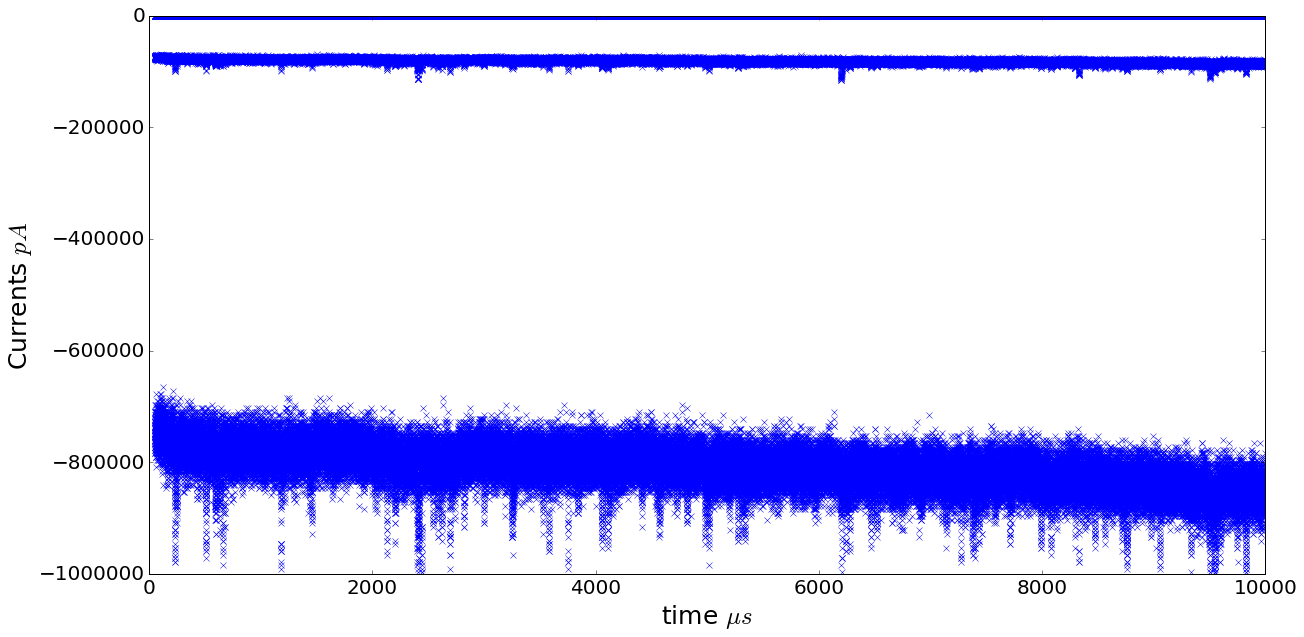

In [20]:
#lets plot and see the data again after getting rid of first 1000
plotData(combinedData1)

# Lets look at the data in detail

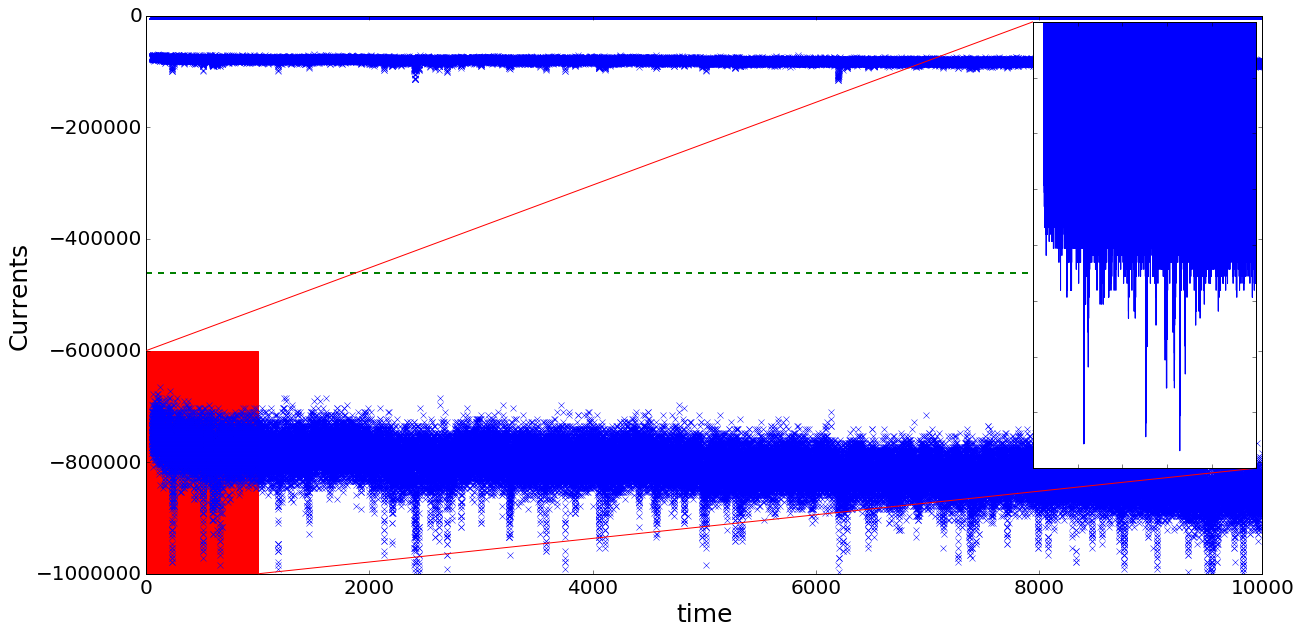

In [21]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes # for zoom in part of plot
from mpl_toolkits.axes_grid1.inset_locator import mark_inset# to mark the zoom in section

average = np.mean(combinedData1[1])
# Lets first check first few data points (1500)
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(combinedData1[0],combinedData1[1],'x')
ax.axhline(average,color='g',linewidth=2,ls='--')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
# zoomed in plot
axins = zoomed_inset_axes(ax, 2, loc=1) # zoom-factor: 2.5, location: upper-left
#axins.axis_off()
axins.plot(combinedData1[0],combinedData1[1])
axins.set_ylim(-1000000,-600000)
axins.set_xlim(0,1000)
plt.yticks(visible=False)
plt.xticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4,fc="r", ec="r")#making line to zoom in section
plt.show()

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

# 3.  Analysing the data and Identifying Peaks
## 3.1 Thresholding : Lets do simple thresholding, with respect to average value

## Task 3: Remove the values greater than Average in data array and corresponding values in timeArray


In [22]:
average = np.mean(combinedData1[1])
combinedData2 = combinedData1[:,combinedData1[1]<average]

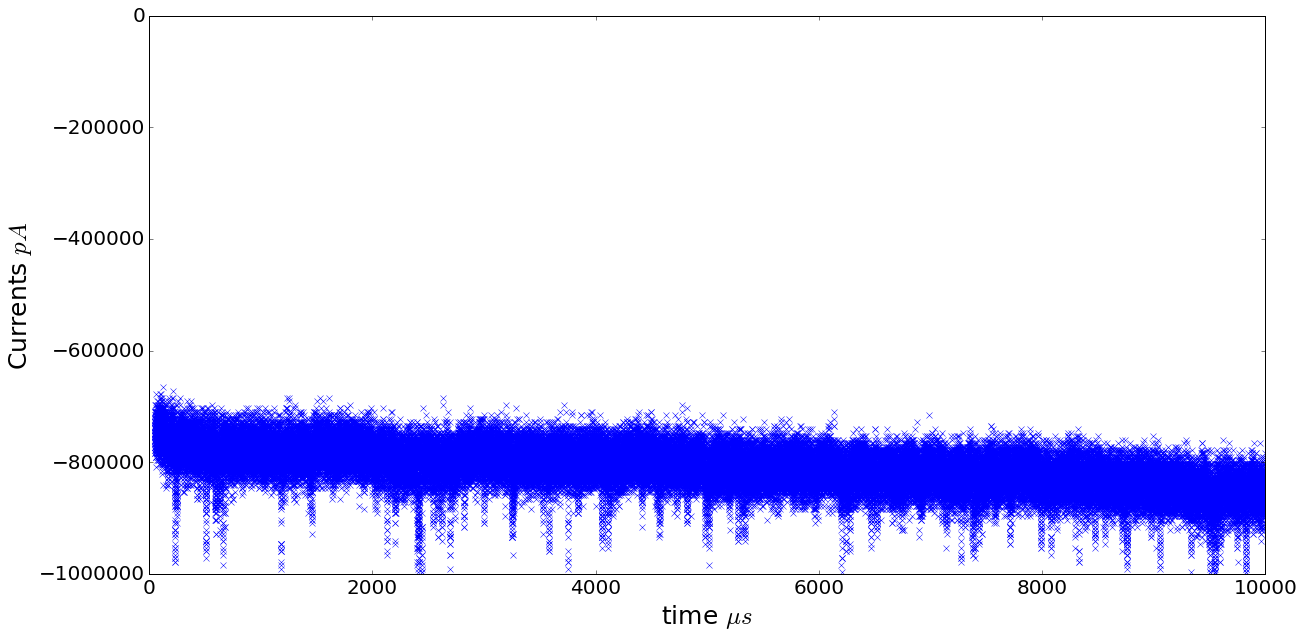

In [23]:
plotData(combinedData2)

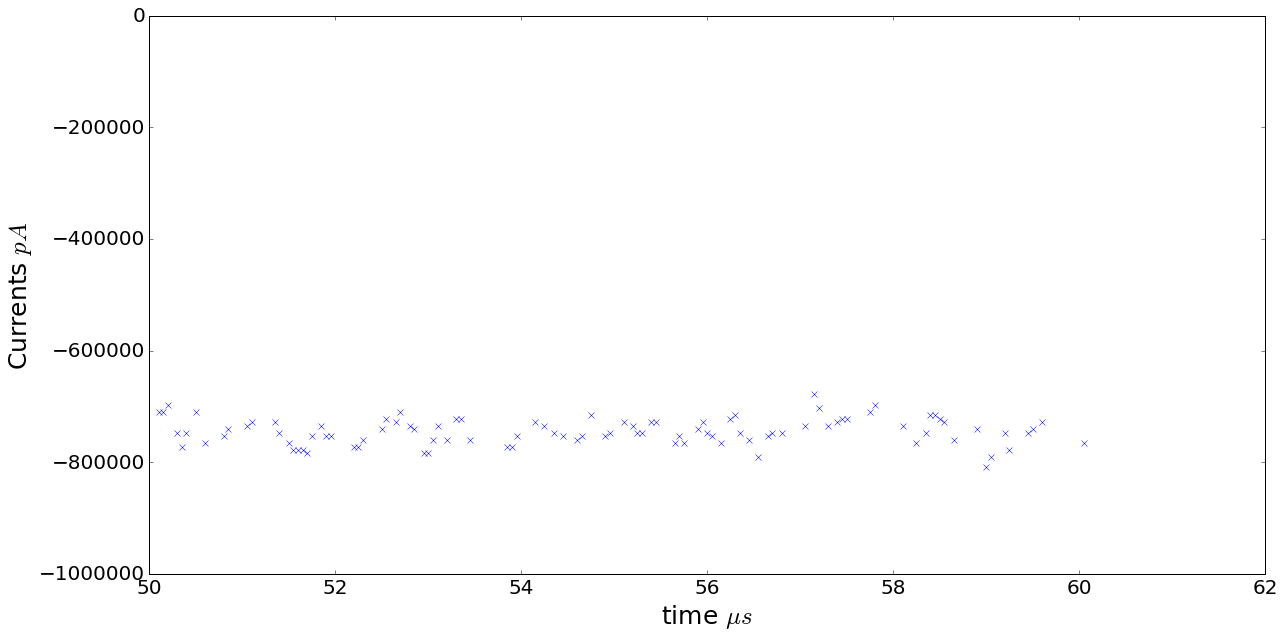

In [39]:
# Lets first check first few data points (1500)
plotData(combinedData2[:,:100])

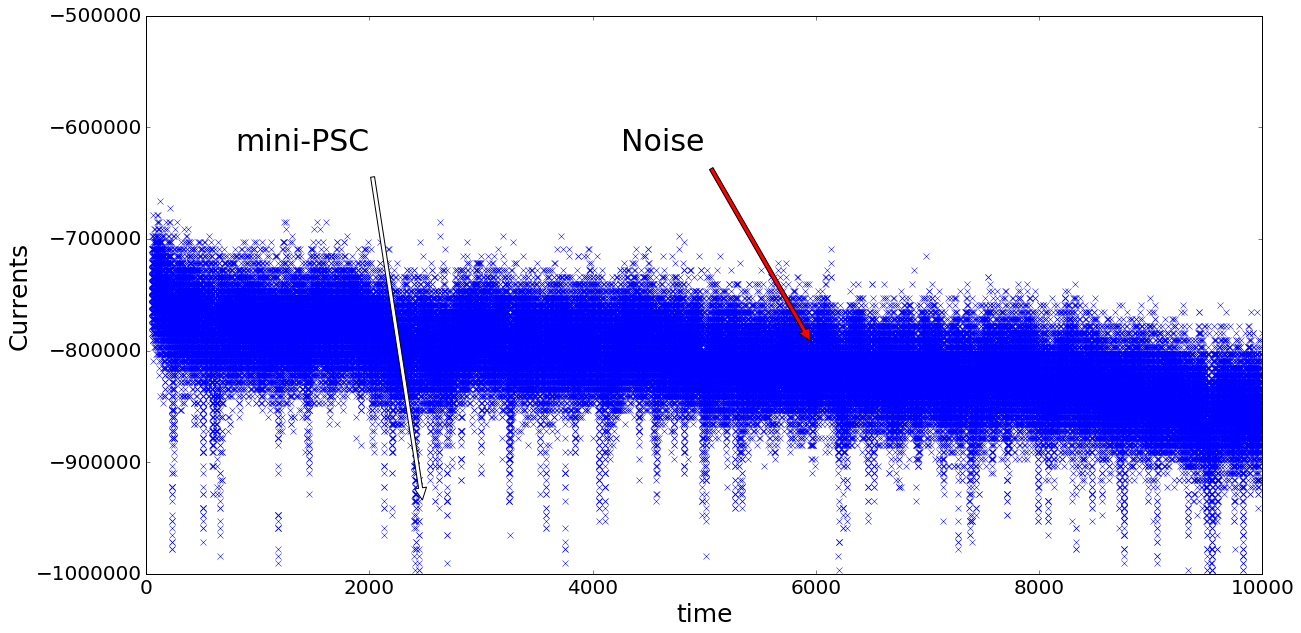

In [38]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(combinedData2[0],combinedData2[1],'x',color='b')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
ax.set_ylim(-1000000,-500000)
ax.annotate('Noise',xy=(6000,-800000),xycoords='data',xytext=(5000,-600000),textcoords='data',arrowprops=dict(facecolor='red',shrink=0.05),horizontalalignment='right', verticalalignment='top',fontsize=30)
ax.annotate('mini-PSC',xy=(2500,-950000),xycoords='data',xytext=(2000,-600000),textcoords='data',arrowprops=dict(facecolor='w',shrink=0.05),horizontalalignment='right', verticalalignment='top',fontsize=30)
plt.show()

## 3.2 Removing the trend
### Task 4: Fit a linear function to the data and subtract it from the data

* You can use : `np.polyfit(..)`

In [59]:
np.polyfit?

In [58]:
#np.polyfit : fit polynomial on data 
func = np.polyfit(combinedData2[0],combinedData2[1], 1)# 1st order polynomial fit :: Line


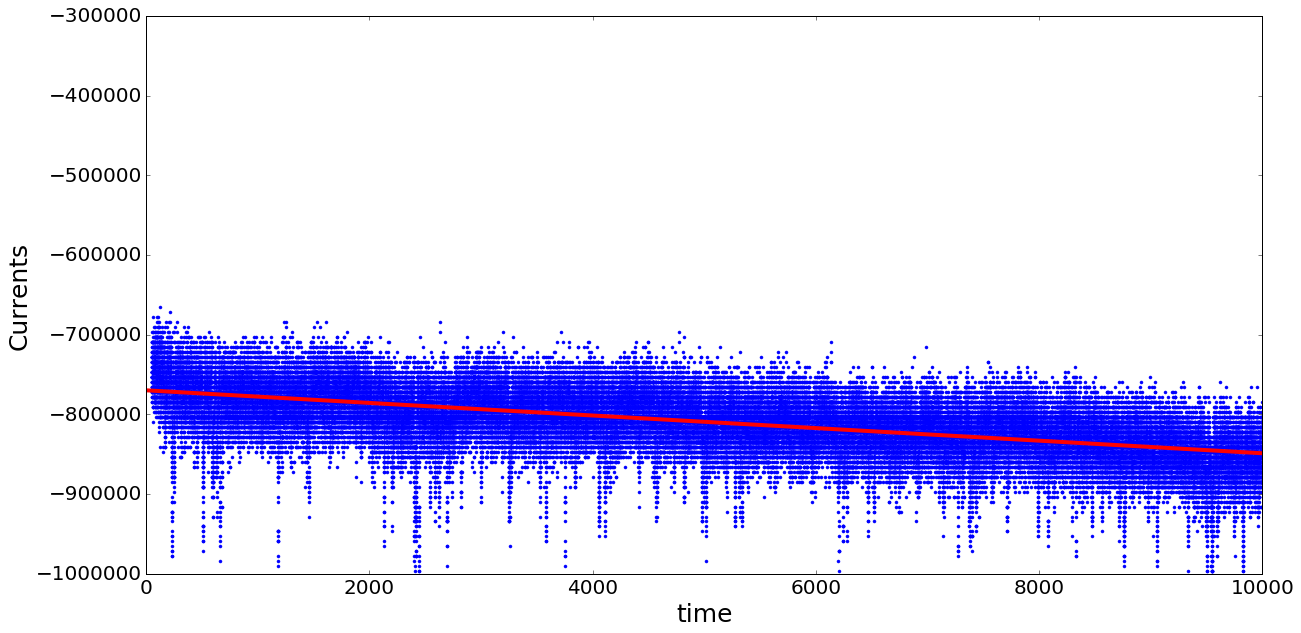

In [67]:
#Plotting noise with fit
xfit = np.array([0,combinedData2[0,-1]])
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(combinedData2[0],combinedData2[1],'.',color='b')
ax.set_ylim(-1000000,-300000)
ax.plot(xfit,func[0]*xfit+func[1],'r',linewidth=4)#Plotting the fitted line
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

Lets remove the trend from our data

In [70]:
combinedData3= np.vstack((combinedData2[0],(combinedData2[1,:]-(func[0]*combinedData2[0,:]+func[1]))))

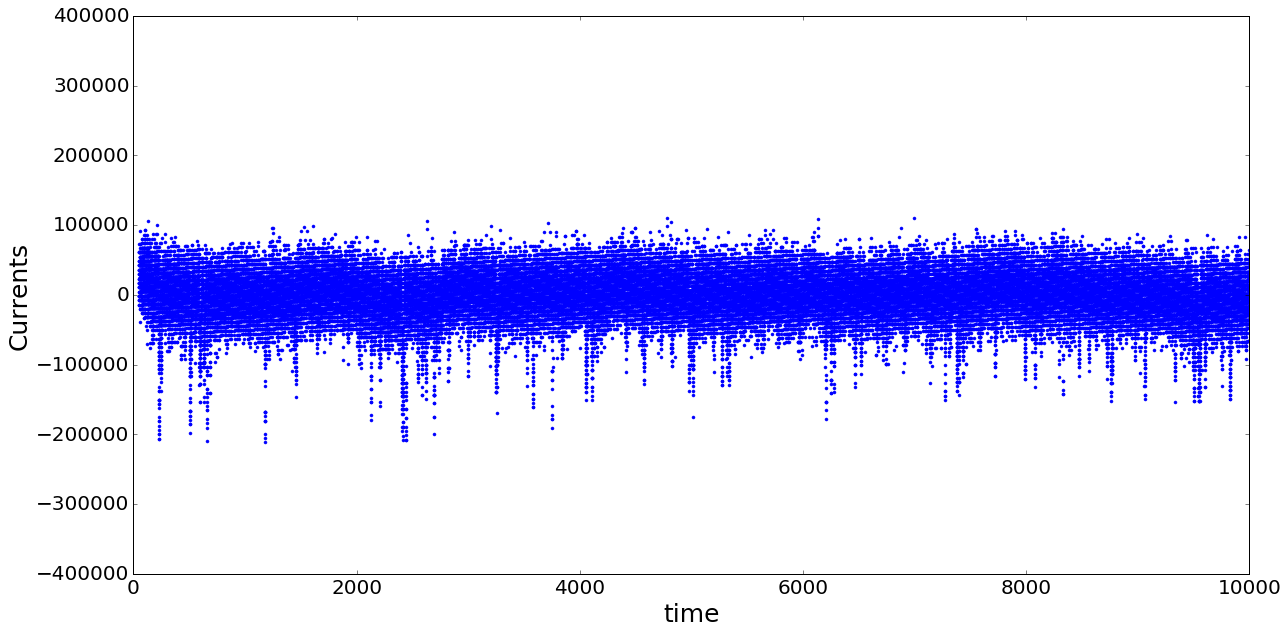

In [74]:
#Plotting noise with fit
xfit = np.array([0,combinedData2[0,-1]])
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(combinedData3[0],combinedData3[1],'.',color='b')
ax.set_ylim(-400000,400000)
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

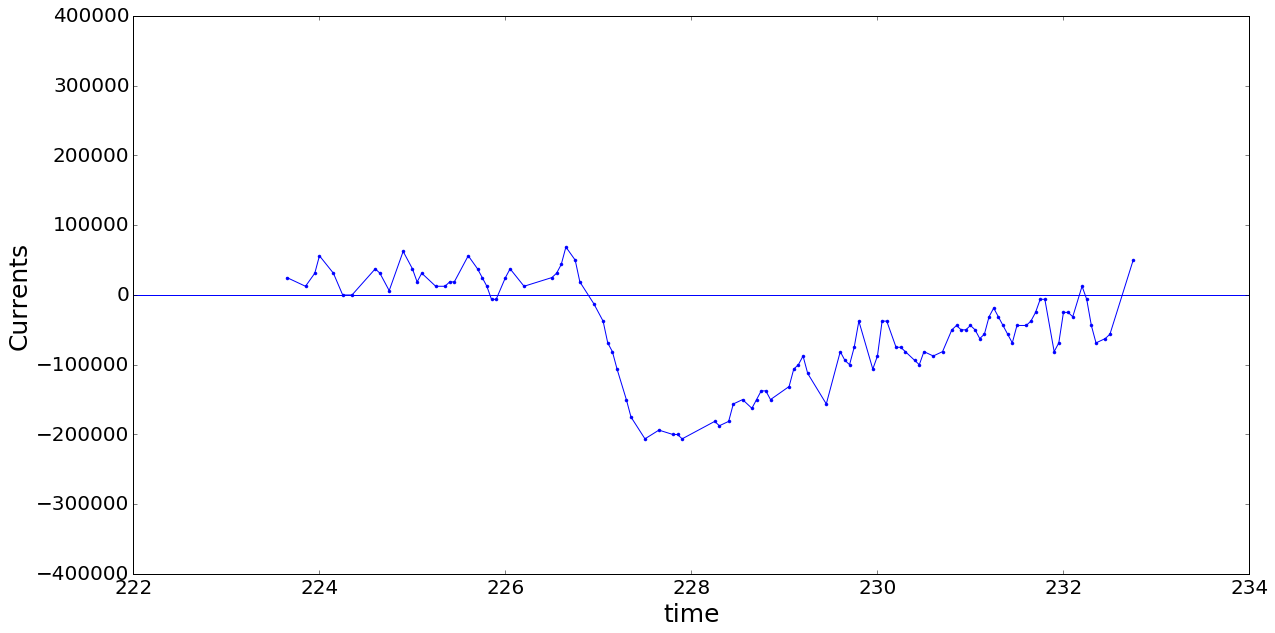

In [104]:
#Plotting a peak
xl=1840
xh=1950
xfit = np.array([0,combinedData2[0,-1]])
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(combinedData3[0,xl:xh],combinedData3[1,xl:xh],'.-',color='b')
ax.set_ylim(-400000,400000)
ax.axhline(np.mean(combinedData3[1]))
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

In [111]:
from scipy import signal
width = np.arange(50,200,10)
peakind = signal.find_peaks_cwt(-1*combinedData3[1],width)


In [131]:
peakData = combinedData3[1,peakind]
print peakData

[ -44440.6266568   -93982.30408039  -50078.74035754  -55813.17680475
  -66778.32910699  -41445.54191326 -116078.80489906 -103297.3372014
 -103096.40163603  -96658.49332735  -20037.19201699  -62705.14018069
  -25066.97230666  -43428.12843261  -24208.75242628  -98995.18436957
  -36349.12118845    1934.48803995  -41574.31032853  -90681.35109697
  -65519.49730168   -2705.65884496   -8227.71153152   -7810.83931731
    4855.75166223   43579.9190261   -12427.30028096  -30606.46957856
  -23978.67913443  -67314.57027771  -35914.9542084   -41470.16718473
  -41259.3624855   -72119.72908074 -145497.63823967 -132753.67325068
   -6936.11420179  -50360.03801909  -12718.31725688  -62595.93999702
 -118284.97842848  -18109.70261114  -29747.53507721    2897.5656851
   -8897.77815736   10484.63594032   -1850.35214155   -7970.47433997
  -95132.94996199  -61707.79285946  -61253.41793659  -54282.97116488
  -28654.10995538  -53299.21590181   -9192.74278682  -21496.5444057
  -21001.11388598  -88755.12089692  -

In [137]:
from scipy import signal
width = np.arange(50,200,10)
peakind = signal.find_peaks_cwt(-1*combinedData3[1],width)
peakData = combinedData3[1,peakind]

In [138]:
peakData

array([ -44440.6266568 ,  -93982.30408039,  -50078.74035754,
        -55813.17680475,  -66778.32910699,  -41445.54191326,
       -116078.80489906, -103297.3372014 , -103096.40163603,
        -96658.49332735,  -20037.19201699,  -62705.14018069,
        -25066.97230666,  -43428.12843261,  -24208.75242628,
        -98995.18436957,  -36349.12118845,    1934.48803995,
        -41574.31032853,  -90681.35109697,  -65519.49730168,
         -2705.65884496,   -8227.71153152,   -7810.83931731,
          4855.75166223,   43579.9190261 ,  -12427.30028096,
        -30606.46957856,  -23978.67913443,  -67314.57027771,
        -35914.9542084 ,  -41470.16718473,  -41259.3624855 ,
        -72119.72908074, -145497.63823967, -132753.67325068,
         -6936.11420179,  -50360.03801909,  -12718.31725688,
        -62595.93999702, -118284.97842848,  -18109.70261114,
        -29747.53507721,    2897.5656851 ,   -8897.77815736,
         10484.63594032,   -1850.35214155,   -7970.47433997,
        -95132.94996199,

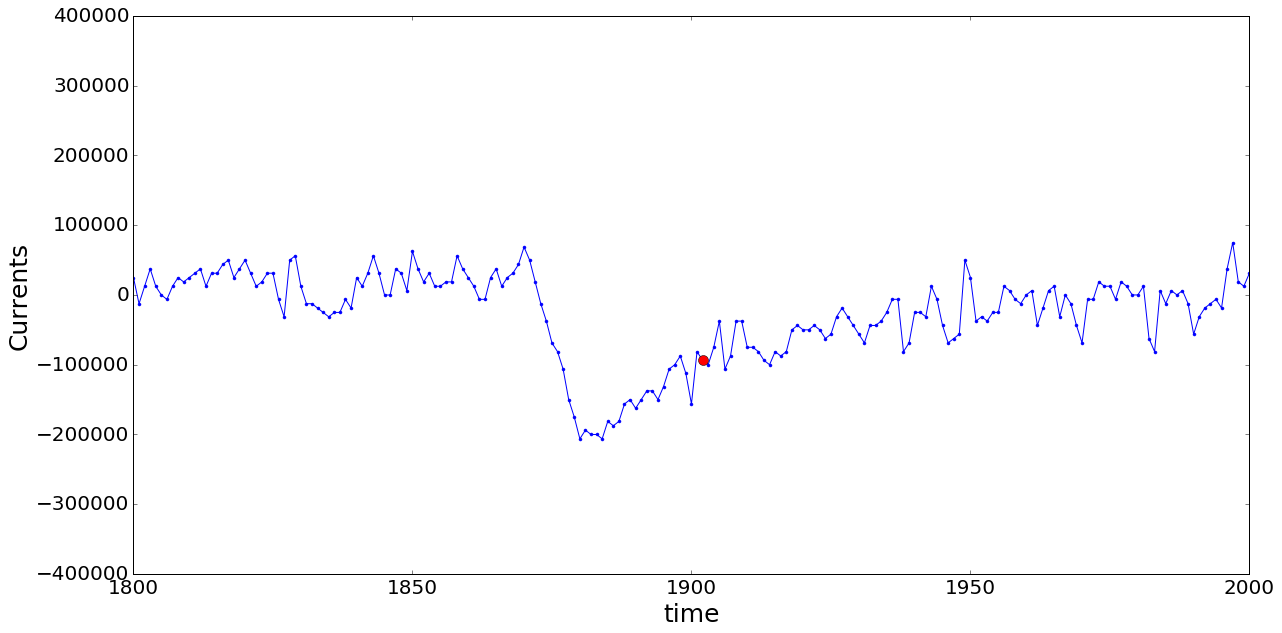

In [150]:

#Plotting a peak
xl=1840
xh=1950
#xfit = np.array([0,combinedData2[0,-1]])
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
#ax.plot(combinedData3[0,xl:xh],combinedData3[1,xl:xh],'.-',color='b')
#ax.plot(combinedData3[0],combinedData3[1],'.-',color='b')
ax.plot(combinedData3[1],'.-',color='b')
ax.set_ylim(-400000,400000)
#ax.axhline(np.mean(combinedData3[1]))
ax.set_xlim(1800,2000)
#ax.scatter(peakData[0],peakData[1],color ='r',s=500)
ax.plot(np.arange(len(combinedData3[1]))[peakind],peakData,'o',color ='r',ms=10)
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

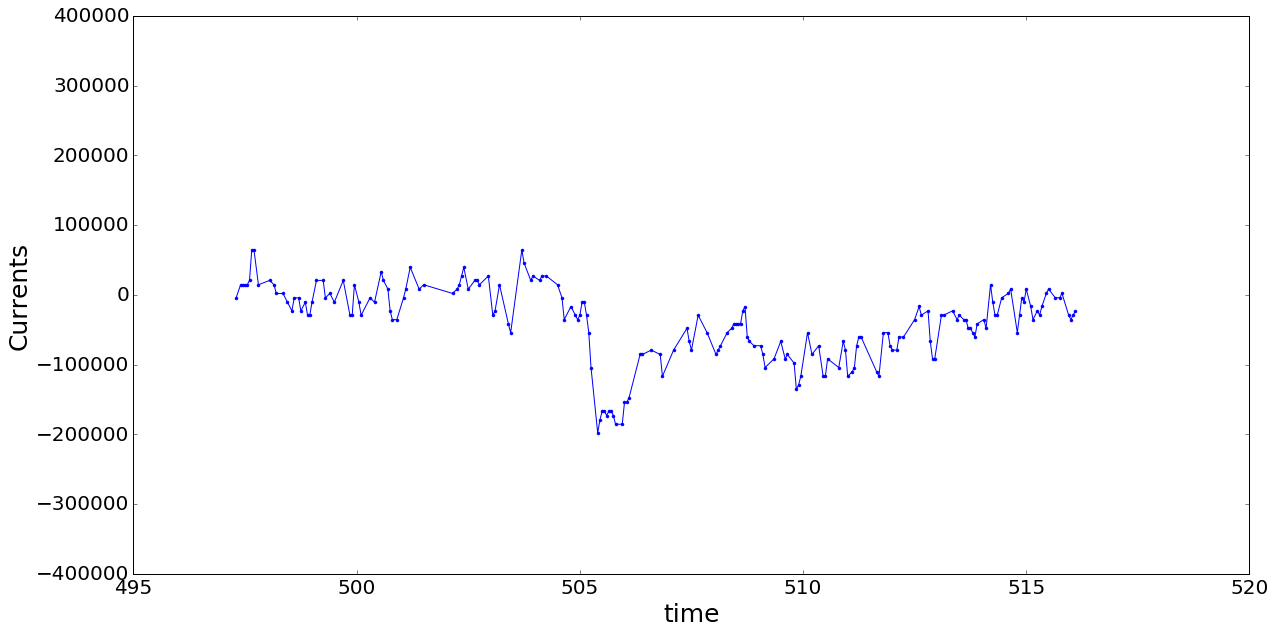

In [92]:
#Plotting a peak
xl=4800
xh=5000
xfit = np.array([0,combinedData2[0,-1]])
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(combinedData3[0,xl:xh],combinedData3[1,xl:xh],'.-',color='b')
ax.set_ylim(-400000,400000)
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

## 2.1.3 Smooth the noise

In [55]:
from scipy.signal import savgol_filter
combinedData3 = np.vstack((combinedData2[0],savgol_filter(combinedData2[1],5,3)))

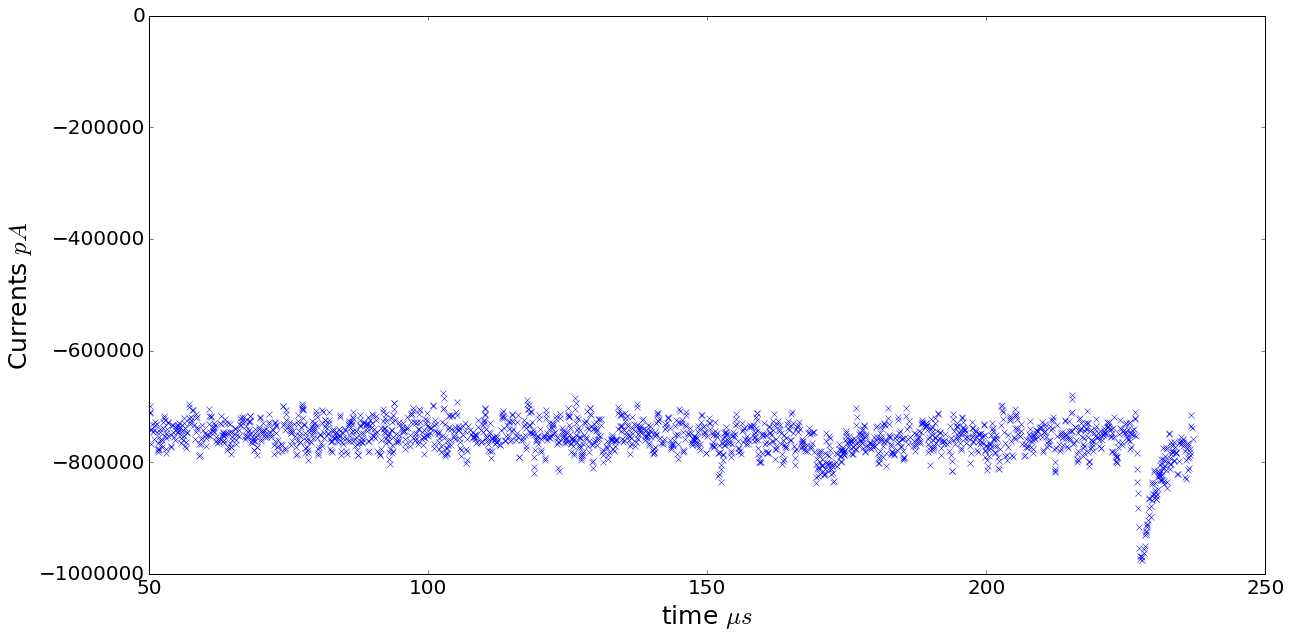

In [56]:
plotData(combinedData3[:,:2000])

In [ ]:
data2 = data1[data1<average]

In [ ]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data2,'x',color='b')
ax.axhline(average,color='g')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

In [ ]:
func

In [ ]:
# Substract the fit from the data : De-trending the data
data3 = np.subtract(data2, func[0]*np.arange(data2.size)+func[1])

In [ ]:
#Plotting Noise fit substracted
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data3,'x',color='b')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

In [ ]:
#Take Out all values above 0
data4 = data3[data3<0]

In [ ]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data4,'x',color='b')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

In [ ]:
newaverage= np.mean(data4)

In [ ]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data4,'x',color='b')
ax.axhline(newaverage,color='r')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

In [ ]:
#LETS LOOK AT SMALL PORTION OF DATA
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data4[0:200],'-x',color='b')
ax.axhline(newaverage,color='r')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

In [ ]:
average = np.mean(data5)

In [ ]:
#LETS LOOK AT SMALL PORTION OF DATA
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data5[500:700],'-x',color='b')
ax.axhline(average,color='r')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

# 3. Calculate Width of the peaks


In [ ]:
newaverage = np.mean(data5)

In [ ]:
minvalue = np.min(data4)

In [ ]:
minvalue

In [ ]:
data5 = np.where(data4<newaverage,minvalue,data4)#all less than average is set to max
data6 = np.where(data4>newaverage,0,data5)#all more than average is set to zero

In [ ]:
#LETS LOOK AT SMALL PORTION OF DATA
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data6[:200],'-x',color='b')
ax.axhline(newaverage,color='r')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

## TASK : 
* Calculate Moving Average with number of elements used = 3 of latest data

In [ ]:
# Calculating MOVING AVERAGE : 
data7 = np.convolve(data6,np.ones(3)/3)

In [ ]:
#LETS LOOK AT SMALL PORTION OF DATA
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(data7[:200],'-x',color='b')
ax.axhline(newaverage,color='r')
ax.set_xlabel('time')
ax.set_ylabel('Currents')
plt.show()

# TASK : 
* Count the width of all the spikes

In [ ]:
# Array that indicates all the data that are not zero
def widthCalculate(mydata):
    isnotzero = np.concatenate(([0], (data6<0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(isnotzero))
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    widthArray = np.array([x[1]-x[0] for x in ranges])
    return widthArray

In [ ]:
widthArray = widthCalculate(data6)

# Plot Histogram of Width 

In [ ]:
#LETS LOOK AT SMALL PORTION OF DATA
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.hist(widthArray,bins=np.arange(1,11))
ax.set_xlabel('Width')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
#Taking Width that are greater than 2
correctedWidthArray = widthArray[widthArray>2]

In [ ]:
#LETS LOOK AT SMALL PORTION OF DATA
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.hist(correctedWidthArray,bins=np.arange(1,np.max(correctedWidthArray)))
ax.set_xlabel('Width')
ax.set_ylabel('Frequency')
plt.show()